In [277]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score,recall_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [278]:
df = pd.read_csv('titanic-passengers.csv',encoding="ISO-8859-1",delimiter=';')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [279]:
#shape of the dataframe
print(df.shape)

#verify if there is any null data
df.isnull().sum()

(891, 12)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Based on third checkpoint results the chosen features for this study are  : Age, Sex , Family size

In [280]:
# filling the missing information with their mean
df["Age"].fillna(df.Age.mean(), inplace=True)

In [281]:
df_ = pd.DataFrame()
df["FamilySize"] = df.SibSp + df.Parch
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.000000,0,0,248740,13.0000,NaN,S,0
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.000000,0,0,348123,7.6500,F G73,S,0
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.000000,0,0,350050,7.8542,NaN,S,0
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.000000,0,4,349909,21.0750,NaN,S,4
4,672,No,1,"Davidson, Mr. Thornton",male,31.000000,1,0,F.C. 12750,52.0000,B71,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C,1
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.000000,0,0,2669,7.2292,NaN,C,0
888,535,No,3,"Cacic, Miss. Marija",female,30.000000,0,0,315084,8.6625,NaN,S,0
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,29.699118,0,0,349215,7.8958,NaN,S,0


In [282]:

# converting the catecorical variables 
df.replace({ "Survived" : {"Yes" : 1 ,"No" : 0} },inplace=True)
df.replace({ "Sex" : {"female" : 1 ,"male" : 0} },inplace=True)

In [283]:
#extracting the feeatures that will be used
df_ = df[["Age","Sex","FamilySize","Survived"]]
df_

,Age,Sex,FamilySize,Survived
0,28.000000,0,0,0
1,25.000000,0,0,0
2,20.000000,0,0,0
3,29.000000,1,4,0
4,31.000000,0,1,0
...,...,...,...,...
886,14.000000,1,1,1
887,22.000000,0,0,0
888,30.000000,1,0,0
889,29.699118,0,0,0


In [284]:
#define the target and the features
x = df_[['Age','Sex','FamilySize']]
y = df_['Survived']

In [285]:
#split the data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

<AxesSubplot:xlabel='Age', ylabel='Survived'>

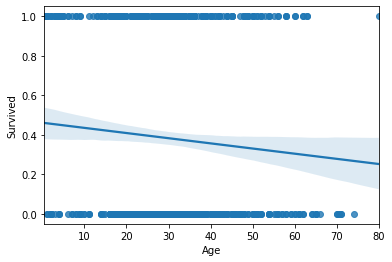

In [286]:
import seaborn as sns
sns.regplot(x='Age',y='Survived',data=df)

In [287]:
# define the logistic regression model
logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy = ",(logreg.score(x_test, y_test)))


Accuracy =  0.8340807174887892


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

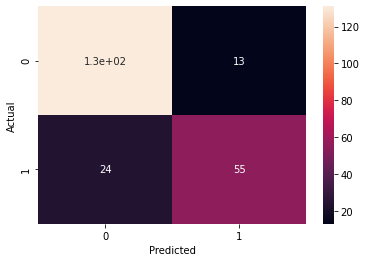

In [288]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

<li> True negative : 130 </li>
<li> True positif : 55 </li>
<li> false negative : 24 </li>
<li> false positif : 13 </li>

In [289]:
print("Classification Report : \n" ,classification_report(y_test,y_pred))

Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.91      0.88       144
           1       0.81      0.70      0.75        79

    accuracy                           0.83       223
   macro avg       0.83      0.80      0.81       223
weighted avg       0.83      0.83      0.83       223



# ROC / AUC
# ref : <a href="https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc?hl=fr"> reference </a>

ROC curve : receiver operating characteristic curve , is a graph showing the performance of a classification model at all classification thresholds. it plots : <br>

   <li> True Positive Rate<br></li>
    <li>False Positive Rate
    </li>


AUC : Area under the ROC Curve. It measures the two-dimensional area underneath the ROC curve

In [290]:
pred_prob = logreg.predict_proba(x_test)

In [291]:
fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1], pos_label=1)

In [292]:
auc_score = roc_auc_score(y_test, pred_prob[:,1])

In [293]:
print("AUC" ,auc_score)

AUC 0.8081487341772152


This ROC curve has an AUC  = 0.80 , wich means it ranks a random positive example higher than a random negative example more than 80% of the time

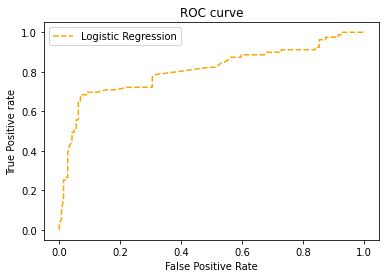

In [294]:

plt.plot(fpr, tpr, linestyle='--',color='orange', label='Logistic Regression')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend()
plt.show()